In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./Data"))

# Any results you write to the current directory are saved as output.

['result.csv', 'sample_submission.csv', 'test', 'test.zip', 'test_s', 'train', 'train.csv', 'train.zip', 'train_s']


In [2]:
import random
import tensorflow as tf
import keras
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.pyplot import imshow
%matplotlib inline

Using TensorFlow backend.


In [4]:
df = pd.DataFrame()
df = pd.read_csv("./Data/train.csv")
df.head()

target = df.Target
ids = df.Id
target = [item.split(' ') for item in df.Target]
lengthes = [len(item) for item in target]

In [5]:
labels = []
counts = []
for item in set(lengthes):
    labels.append(str(item))
    counts.append(lengthes.count(item))

print("counts: ", counts)
print("labels: ", labels)
print("data scale: ", np.sum(counts))

ratio = np.array(counts) / np.sum(counts)
ratio = [round(item, 4) for item in ratio]

print("ratio: ", ratio)

counts:  [15126, 12485, 3160, 299, 2]
labels:  ['1', '2', '3', '4', '5']
data scale:  31072
ratio:  [0.4868, 0.4018, 0.1017, 0.0096, 0.0001]


In [6]:
one_class = []
two_class = []
three_class = []
one_ids = []
two_ids = []
three_ids = []
for idx, item in enumerate(lengthes):
    if item == 1:
        one_class.append(target[idx])
        one_ids.append(ids[idx])
    if item == 2:
        two_class.append(target[idx])
        two_ids.append(ids[idx])
    if item == 3:
        three_class.append(target[idx])
        three_ids.append(ids[idx])

one_class_int = [int(item[0]) for item in one_class]
two_class_int = []
three_class_int = []

for item in two_class:
    a = np.array(item).astype('int')
    a.sort()
    two_class_int.append(a)

for item in three_class:
    a = np.array(item).astype('int')
    a.sort()
    three_class_int.append(a)

one_class = [item[0] for item in one_class]
print("****************************************")
print("one_class scale: ", len(set(one_class)))
two_class = [str(item[0]) + "-" + str(item[1]) for item in two_class_int]
print("****************************************")
print("two_class scale: ", len(set(two_class)))
three_class = [str(item[0]) + "-" + str(item[1]) + "-" + str(item[2]) for item in three_class_int]
print("****************************************")
print("three_class scale: ", len(set(three_class)))

****************************************
one_class scale:  25
****************************************
two_class scale:  201
****************************************
three_class scale:  269


In [7]:
abandon_threshold = 0

In [8]:
def sort_count(source, order=-1):
    label = np.array(list(set(source)))
    count_arr = np.array([source.count(item) for item in label])

    idx = np.argsort(-count_arr)

    label = label[idx]
    count_arr = count_arr[idx]
    
    return label, count_arr

In [9]:
def show_importance(label, count_arr, first_=30):

    for i, item in enumerate(count_arr):
        if item < abandon_threshold:
            break

    total = np.sum(count_arr)
    print("sample scale: ", total)
    print(i, "types picked!")
    label = label[:first_]
    count_arr = count_arr[:first_]
    count_aban = total-np.sum(count_arr)
    print("Sample Abandoned: ", count_aban)
    print("Abandoned Ratio: ", round(count_aban/total, 4))
    print("Abandon Count: ", count_arr[-1])
    fig, axes = plt.subplots(2, 1, figsize=(25, 8))
    sns.barplot(label, count_arr, order=label, ax=axes[0])
    sns.barplot(label, count_arr/total, order=label, ax=axes[1])
    plt.show()

sample scale:  15126
24 types picked!
Sample Abandoned:  0
Abandoned Ratio:  0.0
Abandon Count:  1


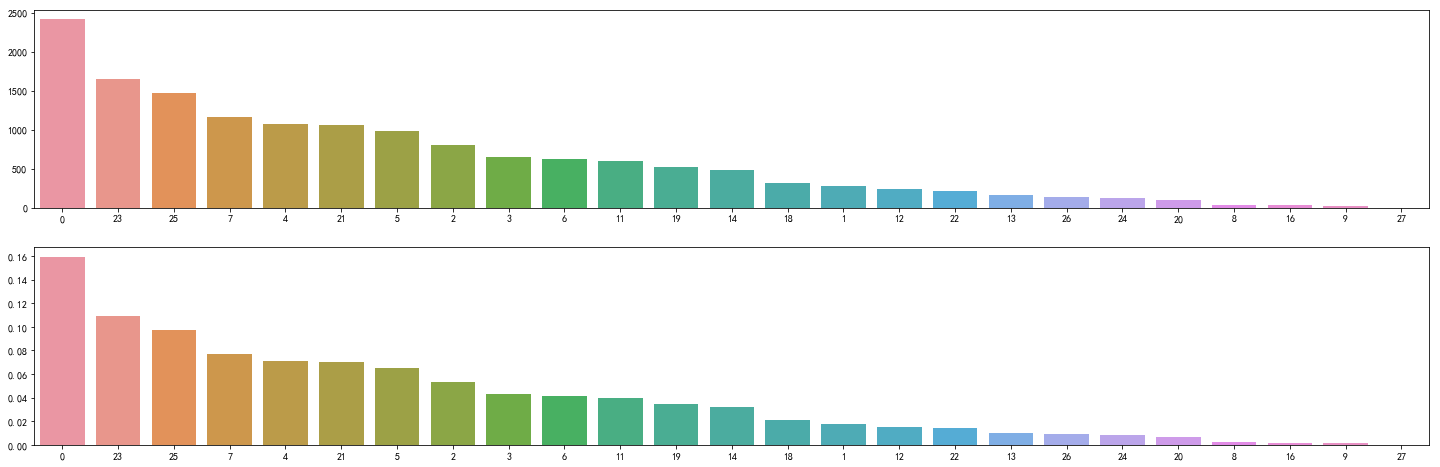

In [10]:
x_one, y_one = sort_count(one_class)
show_importance(x_one, y_one)

sample scale:  12485
200 types picked!
Sample Abandoned:  2934
Abandoned Ratio:  0.235
Abandon Count:  91


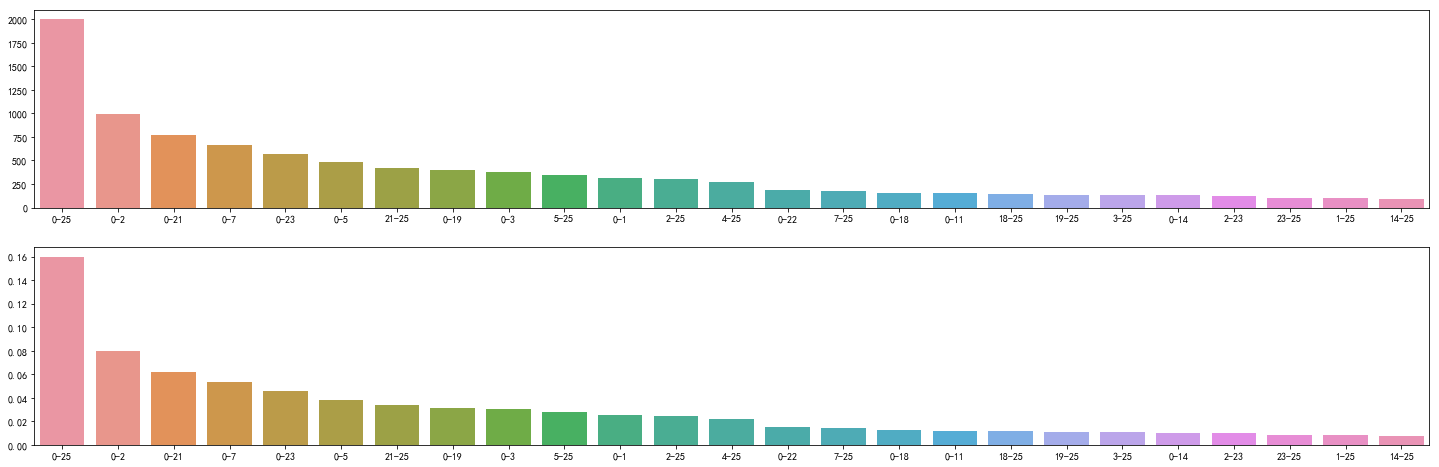

In [11]:
x_two, y_two = sort_count(two_class)
show_importance(x_two, y_two,first_=25)

sample scale:  3160
268 types picked!
Sample Abandoned:  1239
Abandoned Ratio:  0.3921
Abandon Count:  20


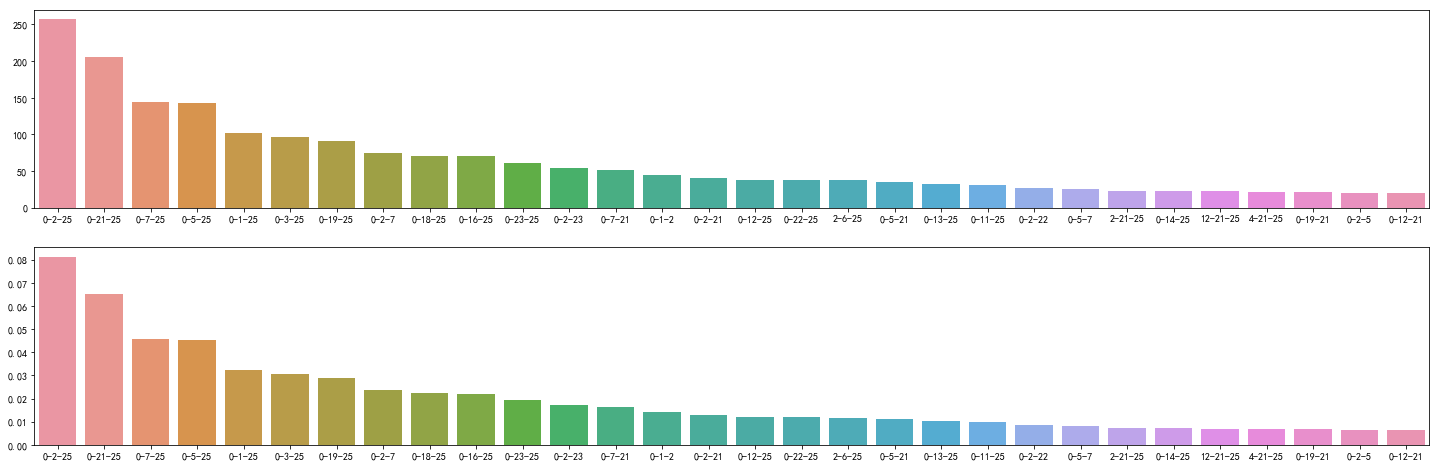

In [12]:
x_three, y_three = sort_count(three_class)
show_importance(x_three, y_three, first_=30)

In [13]:
ids.shape

x = np.hstack([x_one, x_two, x_three])
y = np.hstack([y_one, y_two, y_three])
ids = np.hstack([one_ids, two_ids, three_ids])

idx = np.argsort(-y)

x = x[idx]
y = y[idx]

sample scale:  30771
494 types picked!
Sample Abandoned:  8266
Abandoned Ratio:  0.2686
Abandon Count:  232


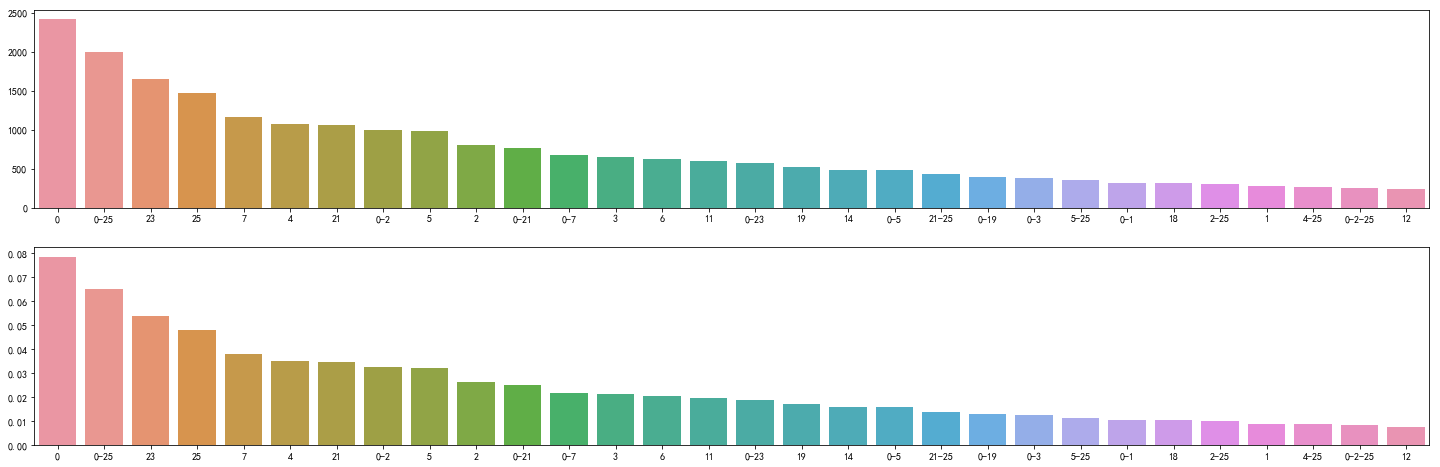

In [14]:
ids.shape
show_importance(x, y, first_=30)

In [15]:
total = np.sum(y)

ratio = [round(item, 4) for item in y / total]

pick = 50
print(ratio[:pick], np.sum(ratio[:pick]))

[0.0785, 0.0649, 0.0537, 0.0478, 0.0378, 0.035, 0.0344, 0.0324, 0.0319, 0.0263, 0.025, 0.0217, 0.0213, 0.0202, 0.0195, 0.0186, 0.017, 0.0157, 0.0156, 0.0138, 0.0128, 0.0124, 0.0114, 0.0103, 0.0102, 0.0098, 0.0088, 0.0087, 0.0084, 0.0075, 0.0069, 0.0067, 0.0062, 0.0056, 0.0051, 0.005, 0.0049, 0.0047, 0.0046, 0.0046, 0.0044, 0.0044, 0.0043, 0.0042, 0.0042, 0.004, 0.0033, 0.0033, 0.0033, 0.0032] 0.8243


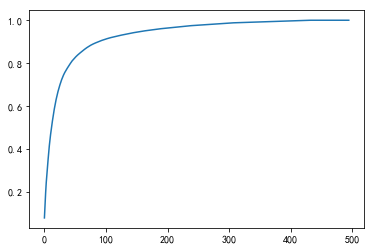

In [16]:
acc_ratio = [np.sum(ratio[:i]) for i in range(1, len(ratio)+1)]

plt.plot(acc_ratio)

In [17]:
def class_encode(one_class_int, two_class_int, three_class_int, f_scale=28):
    """
    
    """
    total = len(one_class_int) + len(two_class_int) + len(three_class_int)
    k_f = 28
    f_mat = np.zeros((total, k_f))
    idx = 0
    for item in one_class_int:
        f_mat[idx][item] = 1
        idx += 1

    for item in two_class_int:
        for num in item:
            f_mat[idx][num] = 1
        idx += 1

    for item in three_class_int:
        for num in item:
            f_mat[idx][num] = 1
        idx += 1
    
    return f_mat

In [18]:
ids = np.hstack([one_ids, two_ids, three_ids])
print(ids.shape)

(30771,)


In [19]:
f_mat = class_encode(one_class_int, two_class_int, three_class_int)
f_mat.shape

(30771, 28)

In [20]:
def mat_to_dict(ids, f_mat):
    res = dict()
    for id_, f in zip(ids, f_mat):
        res[id_] = f
    
    return res

In [21]:
f_dict = mat_to_dict(ids, f_mat)
df_fmat = pd.DataFrame(f_mat)
df_fmat.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


sample scale:  49576.0
27 types picked!
Sample Abandoned:  0.0
Abandoned Ratio:  0.0
Abandon Count:  11.0


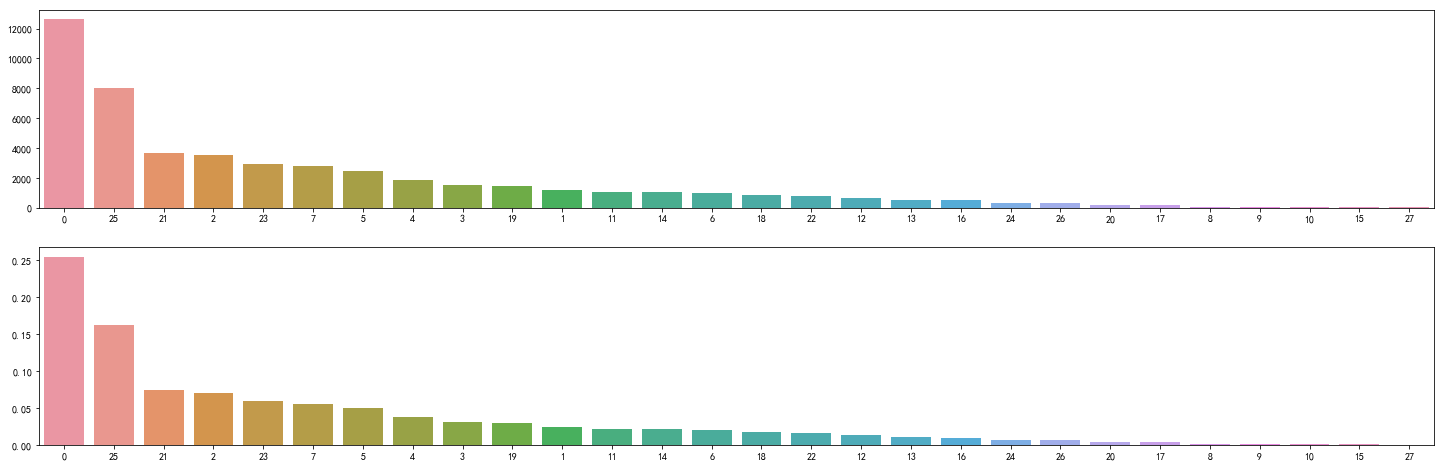

In [22]:
count = np.sum(f_mat, axis=0)
count.shape
n = count.shape[0]

label = np.array([item for item in range(n)])

idx = np.argsort(-count)
count_ord = count[idx]
label_ord = label[idx]

show_importance(label_ord, count_ord)

In [23]:
f_mat.astype('int')
print([(l, int(c)) for (l, c) in zip(label, count)])

[(0, 12617), (1, 1199), (2, 3497), (3, 1536), (4, 1840), (5, 2483), (6, 994), (7, 2757), (8, 53), (9, 45), (10, 28), (11, 1075), (12, 663), (13, 509), (14, 1049), (15, 21), (16, 479), (17, 169), (18, 867), (19, 1461), (20, 172), (21, 3656), (22, 784), (23, 2947), (24, 320), (25, 8026), (26, 318), (27, 11)]


In [24]:
cross = np.zeros((n, n))
cross_pre = np.zeros((n, n))
cross_post = np.zeros((n, n))

i = 0
while i < n:
    j = i+1
    while j < n:
        for item in f_mat:
            if item[i] == 1 and item[j] == 1:
                cross[i][j] += 1
        j += 1
    i += 1

    
cross_ratio = []
cross_ = np.zeros(cross.shape)
i = 0
while i < n:
    j = i+1
    while j < n:
        if count[i] + count[j] > 0:
#             print((i, j), (round(cross[i][j], 4), int(count[i]), int(count[j])))
            if cross[i][j] > 0:
                cross_pre[i][j] = cross[i][j] / count[i]
                cross_post[i][j] = cross[i][j] / count[j]
            cross_[i][j] = cross[i][j] / (count[i] + count[j] - cross[i][j])
            cross_ratio.append((round(cross_[i][j], 4), cross[i][j], round(cross_pre[i][j], 4), round(cross_post[i][j], 4)))
        j += 1
    i += 1


[0.2012, 0.0269, 0.0644, 0.0273, 0.0342, 0.0542, 0.0158, 0.0349, 0.0005, 0.6222, 0.0, 0.0135, 0.0288, 0.0238, 0.0648, 0.0183, 0.0711, 0.035, 0.0287, 0.0285, 0.0055, 0.077, 0.0107, 0.0179, 0.0063, 0.0065, 0.0, 0.0]


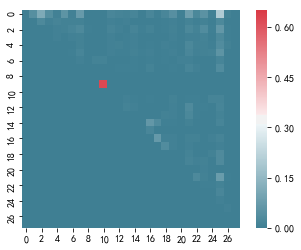

In [25]:
# cross ratio
print([round(item, 4) for item in np.max(cross_, axis=1)])
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(cross_, vmax=.65, cmap=cmap, vmin=0., square=True)

[0.274, 0.2018, 0.1993, 0.1654, 0.1772, 0.2175, 0.1408, 0.132, 0.0377, 0.6222, 0.0, 0.1126, 0.2187, 0.2083, 0.1401, 0.4286, 0.261, 0.3195, 0.286, 0.18, 0.0988, 0.2284, 0.1186, 0.0655, 0.1625, 0.0067, 0.0, 0.0]


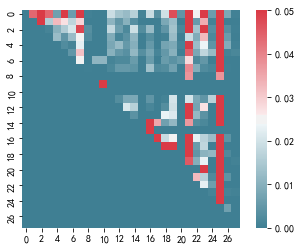

In [26]:
# precious cross ratio
print([round(item, 4) for item in np.max(cross_pre, axis=1)])
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(cross_pre, vmax=.05, cmap=cmap, vmin=0., square=True)

[0.6364, 0.0335, 0.4762, 0.0755, 0.0909, 0.381, 0.3929, 0.0772, 0.0005, 1.0, 0.0, 0.0562, 0.0331, 0.0265, 0.2189, 0.0188, 0.2544, 0.0404, 0.0312, 0.0909, 0.0058, 0.1518, 0.0156, 0.1818, 0.0065, 0.1698, 0.0, 0.0]


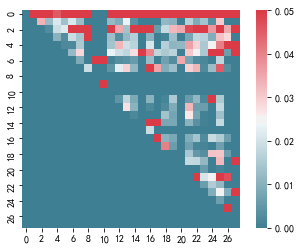

In [27]:
# post cross ratio
print([round(item, 4) for item in np.max(cross_post, axis=1)])
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(cross_post, vmax=.05, cmap=cmap, vmin=0., square=True)

In [28]:
def show_corr_importance(corr, first_=10):
    importance = []
    n, n = corr.shape
    i = 0
    while i < n:
        j = i + 1
        while j < n:
            importance.append([i, j, round(corr[i][j], 4)])
            j += 1
        i += 1
    
    importance = np.array(importance)
    idx = np.argsort(-importance[:, 2])
    f1 = importance[:, 0][idx]
    f2 = importance[:, 1][idx]
    c = importance[:, 2][idx]
    
    importance = np.vstack([f1, f2, c])
    importance = importance.T
    
    print("Positive correlation: ")
    for i in range(first_):
        print(i, ": ", (int(importance[i][0]), int(importance[i][1])), importance[i][2])
    
    print("Negtive correlation: ")
    for i in range(first_):
        print(i, ": ", (int(importance[-i-1][0]), int(importance[-i-1][1])), importance[-i-1][2])
    


In [29]:
corr = df_fmat.corr()
n, n = corr.shape
for i in range(n):
    corr[i][10] = 0
    corr[10][i] = 0
    corr[i][15] = 0
    corr[15][i] = 0
    corr[i][17] = 0
    corr[17][i] = 0

show_corr_importance(corr)


Positive correlation: 
0 :  (14, 16) 0.1109
1 :  (6, 9) 0.0459
2 :  (0, 2) 0.04
3 :  (12, 21) 0.0292
4 :  (13, 21) 0.0288
5 :  (0, 25) 0.025
6 :  (0, 16) 0.0222
7 :  (0, 1) 0.0206
8 :  (5, 27) 0.0196
9 :  (21, 22) 0.0165
Negtive correlation: 
0 :  (0, 4) -0.1868
1 :  (23, 25) -0.1448
2 :  (0, 6) -0.1235
3 :  (7, 23) -0.0994
4 :  (21, 23) -0.0987
5 :  (0, 23) -0.0953
6 :  (7, 25) -0.092
7 :  (2, 5) -0.0858
8 :  (0, 14) -0.0809
9 :  (2, 3) -0.0802


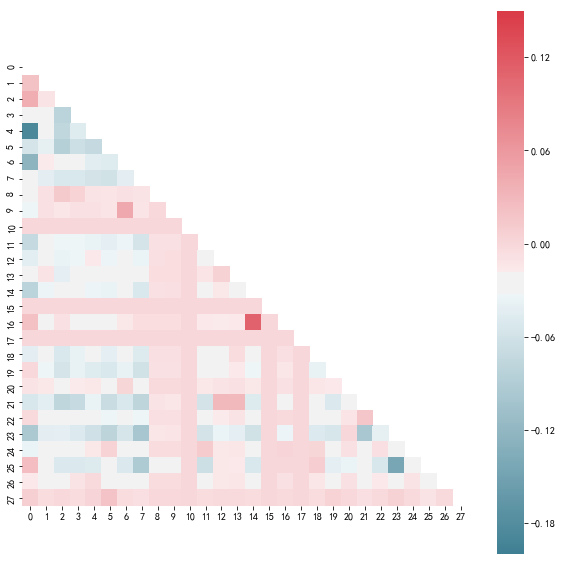

In [30]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)

fig, axes = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(corr, mask=mask, vmax=0.15, vmin=-0.2, cmap=cmap, square=True, ax=axes)

In [8]:
(64*64+9*64*192)/1024

112.0

In [9]:
(192*64+192*96+3*3*96*128+192*16+5*5*16*32+192*32)/1024

159.5

In [11]:
(256*128+256*128+9*128*192+256*32+25*32*96+256*64)/1024

379.0

In [12]:
(480*192+480*96+9*96*208+480*16+25*16*48+480*64)/1024

366.75

In [13]:
def params_count(inp, p1, pr3, p3, pr5, p5, pm):
    return inp*p1 + inp*pr3 + 9*pr3*p3 + inp*pr5 + 25*pr5*p5 + inp*pm

In [15]:
params_count(512, 160, 112, 224, 24, 64, 64)/1024

438.0

In [18]:
params_count(512, 128, 128, 256, 24, 64, 64)/1024

497.5

In [19]:
params_count(512, 112, 144, 288, 32, 64, 64)/1024

590.5

In [20]:
params_count(528, 256, 160, 320, 32, 128, 128)/1024

847.0

In [21]:
params_count(832, 256, 160, 320, 32, 128, 128)/1024

1018.0

In [22]:
params_count(832, 384, 192, 384, 48, 128, 128)/1024

1409.0

In [23]:
28000/1024

27.34375